## 2. Dos atributos
  
Ahora, replicaremos el mismo análisis, pero para una relación lineal con dos atributos,  __y=−3x1+2x2+4__ . Nuevamente, sumaremos algo de ruido para hacerlo más realista.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
n = 500
x1 = np.random.rand(n)
x2 = np.random.rand(n)
y = -3*x1 + 2*x2 + 4 + 0.25*np.random.randn(n)
# y = 10*(x1 - 0.5)**2 + 10*(x2-0.5)**2 + 0.1*np.random.randn(n) # Da como resultado una superficie curva, tipo cuenco.

In [15]:
y.shape

(500,)

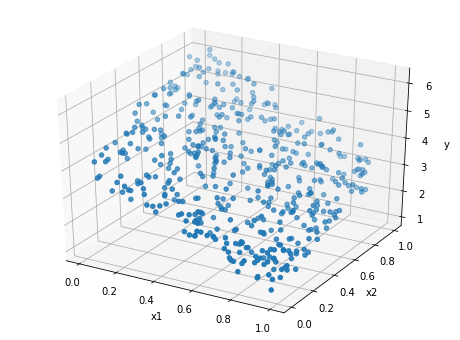

In [4]:
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_scatter(x1, x2, y, ax=None, fig = None):
    if (fig is None) and (ax is None):
        fig = plt.figure(figsize = (8,6))
        ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x1, x2, y)

    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')

plot_3d_scatter(x1, x2, y, ax=None, fig = None)

1. Creamos los atributos y hacemos un `train_test_split`

In [5]:
from sklearn.model_selection import train_test_split

X = np.vstack((x1,x2)).T

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(350, 2) (350,) (150, 2) (150,)


2. Definimos los modelos y entrenamos.

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

linear_model = LinearRegression()
tree_regressor = DecisionTreeRegressor(max_depth=3, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=2)

In [7]:
linear_model.fit(X_train, y_train)
tree_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

3. La regresión lineal obtiene las pendientes y la ordenada al origen.

In [8]:
print(linear_model.coef_, linear_model.intercept_)

[-2.92478435  1.97916573] 3.985607963819903


En este caso, la curva que aproxima a los datos no es más una curva, sino una superficie. La siguiente función nos ayuda a graficar.

In [9]:
from matplotlib import cm

def plot_3d_regressor(x1_min, x1_max, x2_min,x2_max, N, regressor, ax=None, fig = None):
    x1 = np.linspace(x1_min,x1_max,N) 
    x2 = np.linspace(x2_min,x2_max,N)
    X1, X2 = np.meshgrid(x1,x2)
    
    y = regressor.predict(np.array([X1.ravel(), X2.ravel()]).T)
    Y = y.reshape(X1.shape)
    
    if (fig is None) and (ax is None):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
    
    surf = ax.plot_surface(X1, X2, Y, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, alpha = 0.5)

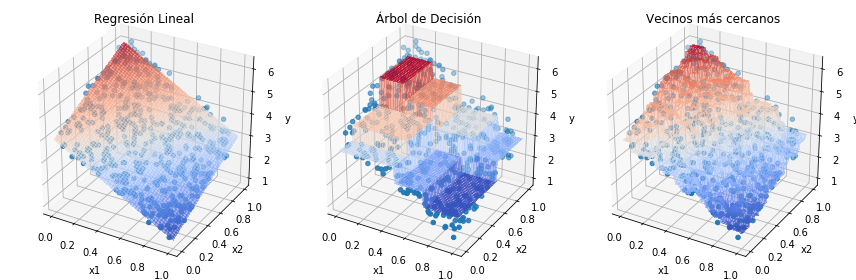

In [10]:
fig = plt.figure(figsize = (12,4))
ax = fig.add_subplot(131, projection='3d')
plt.title('Regresión Lineal')
plot_3d_regressor(0, 1, 0, 1, 100, linear_model, ax, fig)
plot_3d_scatter(x1, x2, y, ax, fig)


ax = fig.add_subplot(132, projection='3d')
plt.title('Árbol de Decisión')
plot_3d_regressor(0, 1, 0, 1, 100, tree_regressor, ax, fig)
plot_3d_scatter(x1, x2, y, ax, fig)

ax = fig.add_subplot(133, projection='3d')
plt.title('Vecinos más cercanos')
plot_3d_regressor(0, 1, 0, 1, 100, knn_regressor, ax, fig)
plot_3d_scatter(x1, x2, y, ax, fig)

plt.tight_layout()
plt.show()

4. Veamos qué aprendió el árbol.

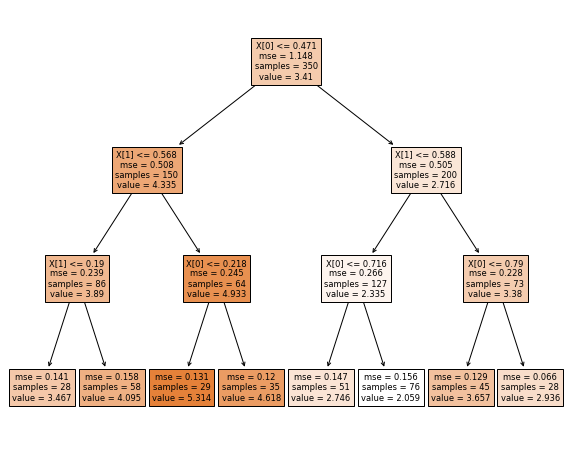

In [11]:
from sklearn import tree

if tree_regressor.max_depth < 4:
    plt.figure(figsize = (10,8))
    tree.plot_tree(tree_regressor, filled = True)
    plt.show()

5. Y, nuevamente, los errores.

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 0.22444993670644495
Raíz del error cuadrático medio en Test: 0.25168943628486506


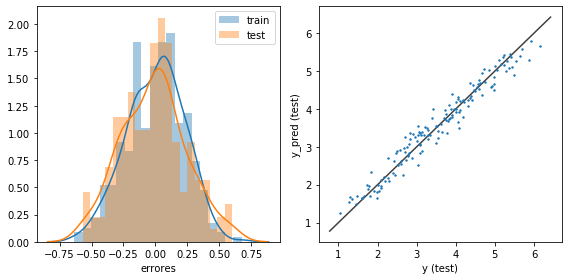

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 0.37057638322625186
Raíz del error cuadrático medio en Test: 0.47898750577500804


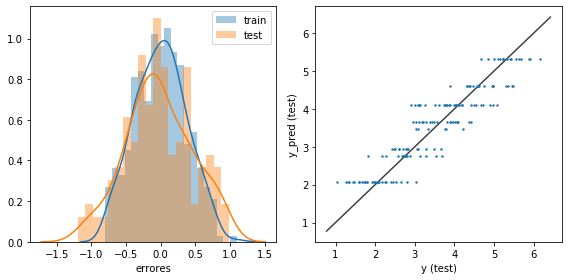

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 0.16733936774052188
Raíz del error cuadrático medio en Test: 0.29145348327464804


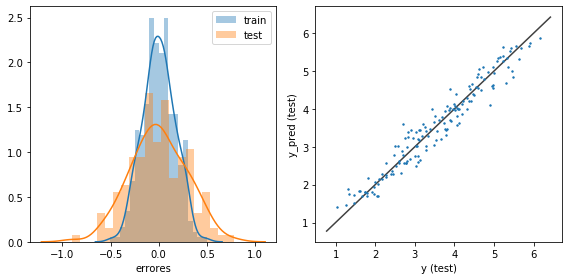

In [12]:
from sklearn.metrics import mean_squared_error
import seaborn as sns
modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([linear_model, tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print(f'Modelo: {modelos[i]}')
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

__Para probar:__ nuevamente, dedicale un buen tiempo a probar distintos valores de max_depth y de n_neighbors.

__Para probar:__ una vez que te sientas cómodo/a con la aproximación de la función lineal, cambia de relación funcional. Te dejamos una comentada para arrancar. Vuelve a responder: ¿Cuáles modelos siguen aproximando correctamente?¿Cuáles no?¿Qué ocurre con el análisis de los errores?